{'South': 5018, 'West': 2605, 'Northeast': 1674, 'Midwest': 3304}
{'South': 331011, 'West': 259401, 'Northeast': 156891, 'Midwest': 211854}
{'South': 2080097, 'West': 1781665, 'Northeast': 760200, 'Midwest': 1226462}
Murder by Region
   Incidents     Region
0       5018      South
1       2605       West
2       1674  Northeast
3       3304    Midwest


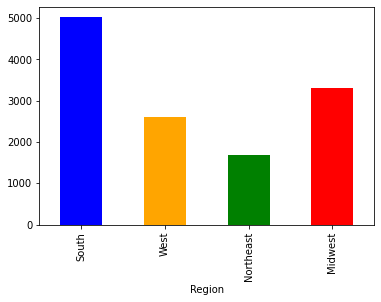

Violent Crimes by Region
   Incidents     Region
0     331011      South
1     259401       West
2     156891  Northeast
3     211854    Midwest


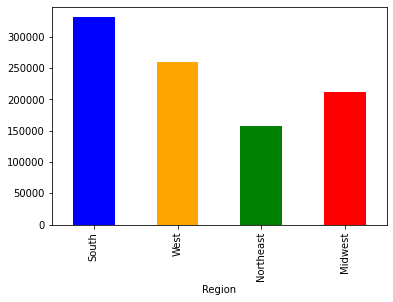

Non-violent Crimes by Region
   Incidents     Region
0    2080097      South
1    1781665       West
2     760200  Northeast
3    1226462    Midwest


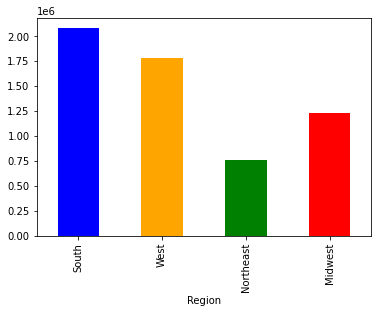

National Average Violent Crime 18807

State                Crimes  Distance from Mean  
ALABAMA               15,350    -3,457
ALASKA                 4,697   -14,110
ARIZONA               23,856     5,049
ARKANSAS              12,048    -6,759
CALIFORNIA           145,205   126,398
COLORADO              15,533    -3,274
CONNECTICUT            7,754   -11,053
DELAWARE               2,359   -16,448
DISTRICT OF COLUMBIA   7,711   -11,096
FLORIDA               50,540    31,733
GEORGIA               18,496      -311
HAWAII                 3,331   -15,476
IDAHO                  2,676   -16,131
ILLINOIS              50,968    32,161
INDIANA               21,325     2,518
IOWA                   7,533   -11,274
KANSAS                 7,982   -10,825
KENTUCKY               8,342   -10,465
LOUISIANA             16,444    -2,363
MAINE                  1,254   -17,553
MARYLAND              14,175    -4,632
MASSACHUSETTS         24,155     5,348
MICHIGAN              35,790    16,983
MINNESOTA      

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt


f = open("FBI_CrimeData_2016.json", 'r')
crime_list = json.load(f)
#print(crime_list)
#crime
def accum_crime(key, crime, crime_list):
    result = {}
    for d in crime_list:
        if d[key] in result:
            result[d[key]] = int(d[crime]) + int(result[d[key]])
        else:
            result[d[key]] = int(d[crime])
    return result

#violent crime
def accum_violent_crime(key, crime_list):
    result = {}
    for d in crime_list:
        if d[key] in result:
            result[d[key]] = int(d['Murder'])+ int(d['Rape'])+int(d['Robbery'])+int(d['Assault']) + int(result[d[key]])
        else:
            result[d[key]] = int(d['Murder'])+ int(d['Rape'])+int(d['Robbery'])+int(d['Assault'])
    return result

 #nonviolent crime  
def accum_nonviolent_crime(key, crime_list):
    result = {}
    for d in crime_list:
        if d[key] in result:
            result[d[key]] = int(d['Burglary'])+ int(d['Theft'])+int(d['Vehicle_Theft'])+ int(result[d[key]])
        else:
            result[d[key]] = int(d['Burglary'])+ int(d['Theft'])+int(d['Vehicle_Theft'])
    return result

murder_by_region = accum_crime('Region', 'Murder', crime_list)
violent_by_region = accum_violent_crime('Region', crime_list)
nonviolent_by_region = accum_nonviolent_crime('Region', crime_list)

print(murder_by_region)  
print(violent_by_region)
print(nonviolent_by_region)

#pie chart
def crime_pie(d):
    crime = []
    region = []
    
    for key, value in d.items():
        crime.append(value)
        region.append(key)
    d = {'Region':pd.Series(crime, index = region)}   
    return d
    
#bar chart
def crime_bar(d):
    incidents = []
    region = []
    
    for key, value in d.items():
        incidents.append(value)
        region.append(key)
    d = {'Incidents':pd.Series(incidents), 'Region':pd.Series(region)}   
    return d

#Bar chart murder by region
d_murder = crime_bar(murder_by_region)
f_murder = pd.DataFrame(d_murder)
print('Murder by Region')
print(f_murder)
f_murder.plot.bar(x='Region', y='Incidents',legend = False,color=['blue', 'orange', 'green', 'red'])
plt.show()

#Bar chart violent crimes by region
d_violent = crime_bar(violent_by_region)
f_violent = pd.DataFrame(d_violent)
print('Violent Crimes by Region')
print(f_violent)
f_violent.plot.bar(x='Region', y='Incidents',legend = False,color=['blue', 'orange', 'green', 'red'])
plt.show()

#Bar chart nonviolent crimes by region
d_nonviolent = crime_bar(nonviolent_by_region)
f_nonviolent = pd.DataFrame(d_nonviolent)
print('Non-violent Crimes by Region')
print(f_nonviolent)
f_nonviolent.plot.bar(x='Region', y='Incidents',legend = False,color=['blue', 'orange', 'green', 'red'])
plt.show()

#state
violent_by_state = accum_violent_crime('State', crime_list)
total = 0
for state in violent_by_state:
    total = total + violent_by_state[state]
avg = int(total/51)
print('National Average Violent Crime', avg)
print()
output = "{:<20}{:8,}{:10,}"
print("{:21}{:8}{:20}".format('State', 'Crimes', 'Distance from Mean'))
for state, crimes in violent_by_state.items():
    print(output.format(state, crimes, crimes-avg))
    

In [ ]:
e